# Your First Classifier & Standarization

Hi, I'm **Mehdi** today we will take a look at the following points :
1) [Encoding with onehot and label encoders](#1)<br>
2) [Standarization](#2)<br>
3) [Classification using Logistic Regression](#3)<br>
4) [Usecase of logistic and smote](#4)<br>
5) [Confusion matrix as a way of evaluating classification models](#5)<br>
6) [Assignment time](#6)<br>

<br><br>
<center><h1>Lets dive right into it !!!!</h1></center>
<br><br>

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple

# I. Encoders
<a id="1"></a>

## 1. Label Encoding
Given a vector A[N] representing a given nominal characteristic, we want to encode the values using label. To facilitate the task, we give you the detailed algorithm: 
1. Find the unique values in the vector A, we call it a V vocabulary.
2. Assign a value for each unique item from the vector V.
3. Map the values of A to the corresponding values
<br><br>
<img src="img/label.png"  width="500">

### 1.1. How can we do it using sklearn !

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

In [35]:
A = np.array(['HOT', 'MILD', 'COLD', 'HOT', 'MILD']).reshape(-1,1)
A_label = encoder.fit_transform(A)
A_label

array([1, 2, 0, 1, 2], dtype=int64)

## 2. One-Hot Encoding

Given a vector A[N] representing a given nominal characteristic, we want to encode the values using One-Hot. To facilitate the task, we give you the detailed algorithm: 
1. Find the unique values in the vector A, we call it a V vocabulary.
2. Create a matrix X[N, |V|] by copying the vector V, N times. In python, we can copy a vector using the instruction: [V] * N
3. Compare the equality between each row of A and each row (which is a vector) of X.
4. Transform booleans to integers
<br><br>
<img src="img/onehot.png"  width="400">

### 2.1. How can we do it using sklearn !

In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder =  OneHotEncoder()

In [4]:
A = np.array(['HOT', 'MILD', 'COLD', 'HOT', 'MILD']).reshape(-1,1)
A_one_hot = encoder.fit_transform(A)
A_one_hot.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3. But why onehot or label encoding ?????

Encoding makes our training data more useful and expressive, and it can be rescaled easily

# II. Lets Standarization because why not ?!
<a id="2"></a>

Here, we are going to implement the two functions of nominalization: standard and min-max.
We will take a matrix $X[N, M]$ with $N$ samples and $M$ columns.
The standard normalization of a column $j$ can be described as: 
$$standard(X_j) = \frac{X_j - \mu(X_j)}{\sigma(X_j)}$$

In [7]:
# Input: the data matrix (N samples X M features)
# Output: vector of M means, vector of M standard deviations, a normalized matrix
def norm_std(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    return X.mean(axis=0), X.std(axis=0), (X - X.mean(axis=0))/X.std(axis=0)

# Lets Test it !
X = np.array([
    [7, 5, 0],
    [2, 1, 1],
    [3, 5, 0],
    [4, 1, 1],
])

norm_std(X)

(array([4. , 3. , 0.5]),
 array([1.87082869, 2.        , 0.5       ]),
 array([[ 1.60356745,  1.        , -1.        ],
        [-1.06904497, -1.        ,  1.        ],
        [-0.53452248,  1.        , -1.        ],
        [ 0.        , -1.        ,  1.        ]]))

### 1.2) Standarization using Sklearn

In [6]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()

In [7]:
# We will use the same data
X = np.array([
    [7, 5, 0],
    [2, 1, 1],
    [3, 5, 0],
    [4, 1, 1],
])
X_scaled = encoder.fit_transform(X)
X_scaled

array([[ 1.60356745,  1.        , -1.        ],
       [-1.06904497, -1.        ,  1.        ],
       [-0.53452248,  1.        , -1.        ],
       [ 0.        , -1.        ,  1.        ]])

### 1. Why Standarize ?
<ul>
<li>Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
<li>It makes algorithms converge faster.
</ul>


# III. Your first classifier Logistic regression is here !
<a id="3"></a>

### 1. Whats Logistic regression do you mean linear ? 

The logistic regression statistic modeling technique is used when we have a binary outcome variable. For example: given the parameters, will the student pass or fail? Will it rain or not? etc.

So, though we may have continuous or categorical independent variables, we can use the logistic regression modeling technique to predict the outcome when the outcome variable is binary.<br>
<img src="img/formula.png" width="200">
<h3>With graphs<h3>
<center>
    <img src="img/logisticVSlinear.jpeg">
</center>

Check the following video for more details :  <a src="https://youtu.be/yIYKR4sgzI8">StatQuest</a>

# IV. Enough talk lets do it !!!!!
<a id="4"></a>

But we need data :<br><br>
**LOGISTIC REGRESSION - HEART DISEASE PREDICTION**<br>

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression. <br><br>Here is the <a src="https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression">link</a> to get the data.

**Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.**<br><br>

**Demographic:**<br>
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)<br><br>
**Behavioral**<br>
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br><br>
**Medical( history)**<br>
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)<br><br>
**Medical(current)**<br>
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)<br><br>
**Predict variable (desired target)**<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# Read data from the given framingham csv file

In [8]:
path = 'data/framingham.csv'
data = pd.read_csv(path)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Review general properties of the dataset

After successfully reading the data from the given csv file, we now want to get general understanding of how the given data looks like. We will perform a couple of pandas operations to extract some basic information from the data.

In [9]:
data.shape #shape of the dataset => data contains 4238 rows and 16 columns

(4238, 16)

In [10]:
data.info() # get information about the datatype of each column contained in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [11]:
data.columns # Get all colums contained in the dataset.

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
data.describe() # get statistical summaries for numeric columns

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Check null values

Before going further, it is extremely important to know if our data contains any null values. **Null values affects the performance and accuracy** of the machine learning model and therefore it is important to identify them and deal with them accordingly.

In [13]:
data.isnull().sum() # We have null values on some columns => education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Replace null values with mean values for respective columns

There are diferent ways to deal with null values. If the null values contained in a dataset are negligibly few, we can decide to delete the entire rows or columns containing these null values. 

In other cases (like the one we have), we do not want to delete the rows or columns containing these values since we can potentially loose a lot of other useful information for our model - We have a total of 645 rows with null values, **if we delete, we will lose about 15% of our original data!**

Instead, considering exchangability of the data, we will reasonably replace the null values with mean values for each respective column. 

In [14]:
columns_with_na = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']

for i in columns_with_na: 
    data[i].fillna(data[i].mean(),inplace=True)
    
data.isnull().sum() # Check again the null values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Check unique values for each column

In another attempt to clearly understand the data provided, we may decide to know  unique values contained in each column. It can be seen below that we have six columns (***male,currentSmoker,prevalentStroke, prevalentHyp, diabetes,TenYearCHD***) which are binary (containing only 2 possible values.)

This might not be a very useful piece of information - But it helps us to know better how to treat each column in our dataset.

In [15]:
data.nunique()

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1364
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

## Exploratory Data Analysis (EDA)

The goal of the Exploratory Data Analysis is to simply explore the data and visualize the relationship between different columns (features) on our data.

This step will reveal important considerations we must think of when modeling our data.

## Visualize the distribution of the output variable

Remember that, the goal of the model is to predict whether the patient has 10-year risk of future coronary heart disease (CHD) and therefore the predicted (output) variable in this case is the column named 'TenYearCHD' from our dataset.

We start by to visualizing how this column looks like from the given data.

C:\Users\mzz30\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


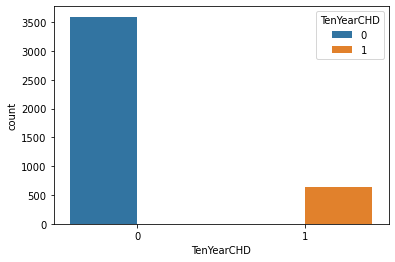

In [16]:
sns.countplot(data['TenYearCHD'],hue=data['TenYearCHD'])
plt.show()

It can be seen from the histogram above that, the dataset is highly unbalanced. It contains about 3500 examples with patients without the risk and only around 500 examples of patitents identified under risk. 

Later in this notebook, we will have to find ways to balance this dataset.


## Visualize relationship between pair of all features in the dataset

Next, it is important to get an intuition of how the features in our dataset relates to each other. 

To do that, we will use the seaborn pairplot function which taken in dataframe and plot the scatterplots for each pair of features from the dataset.


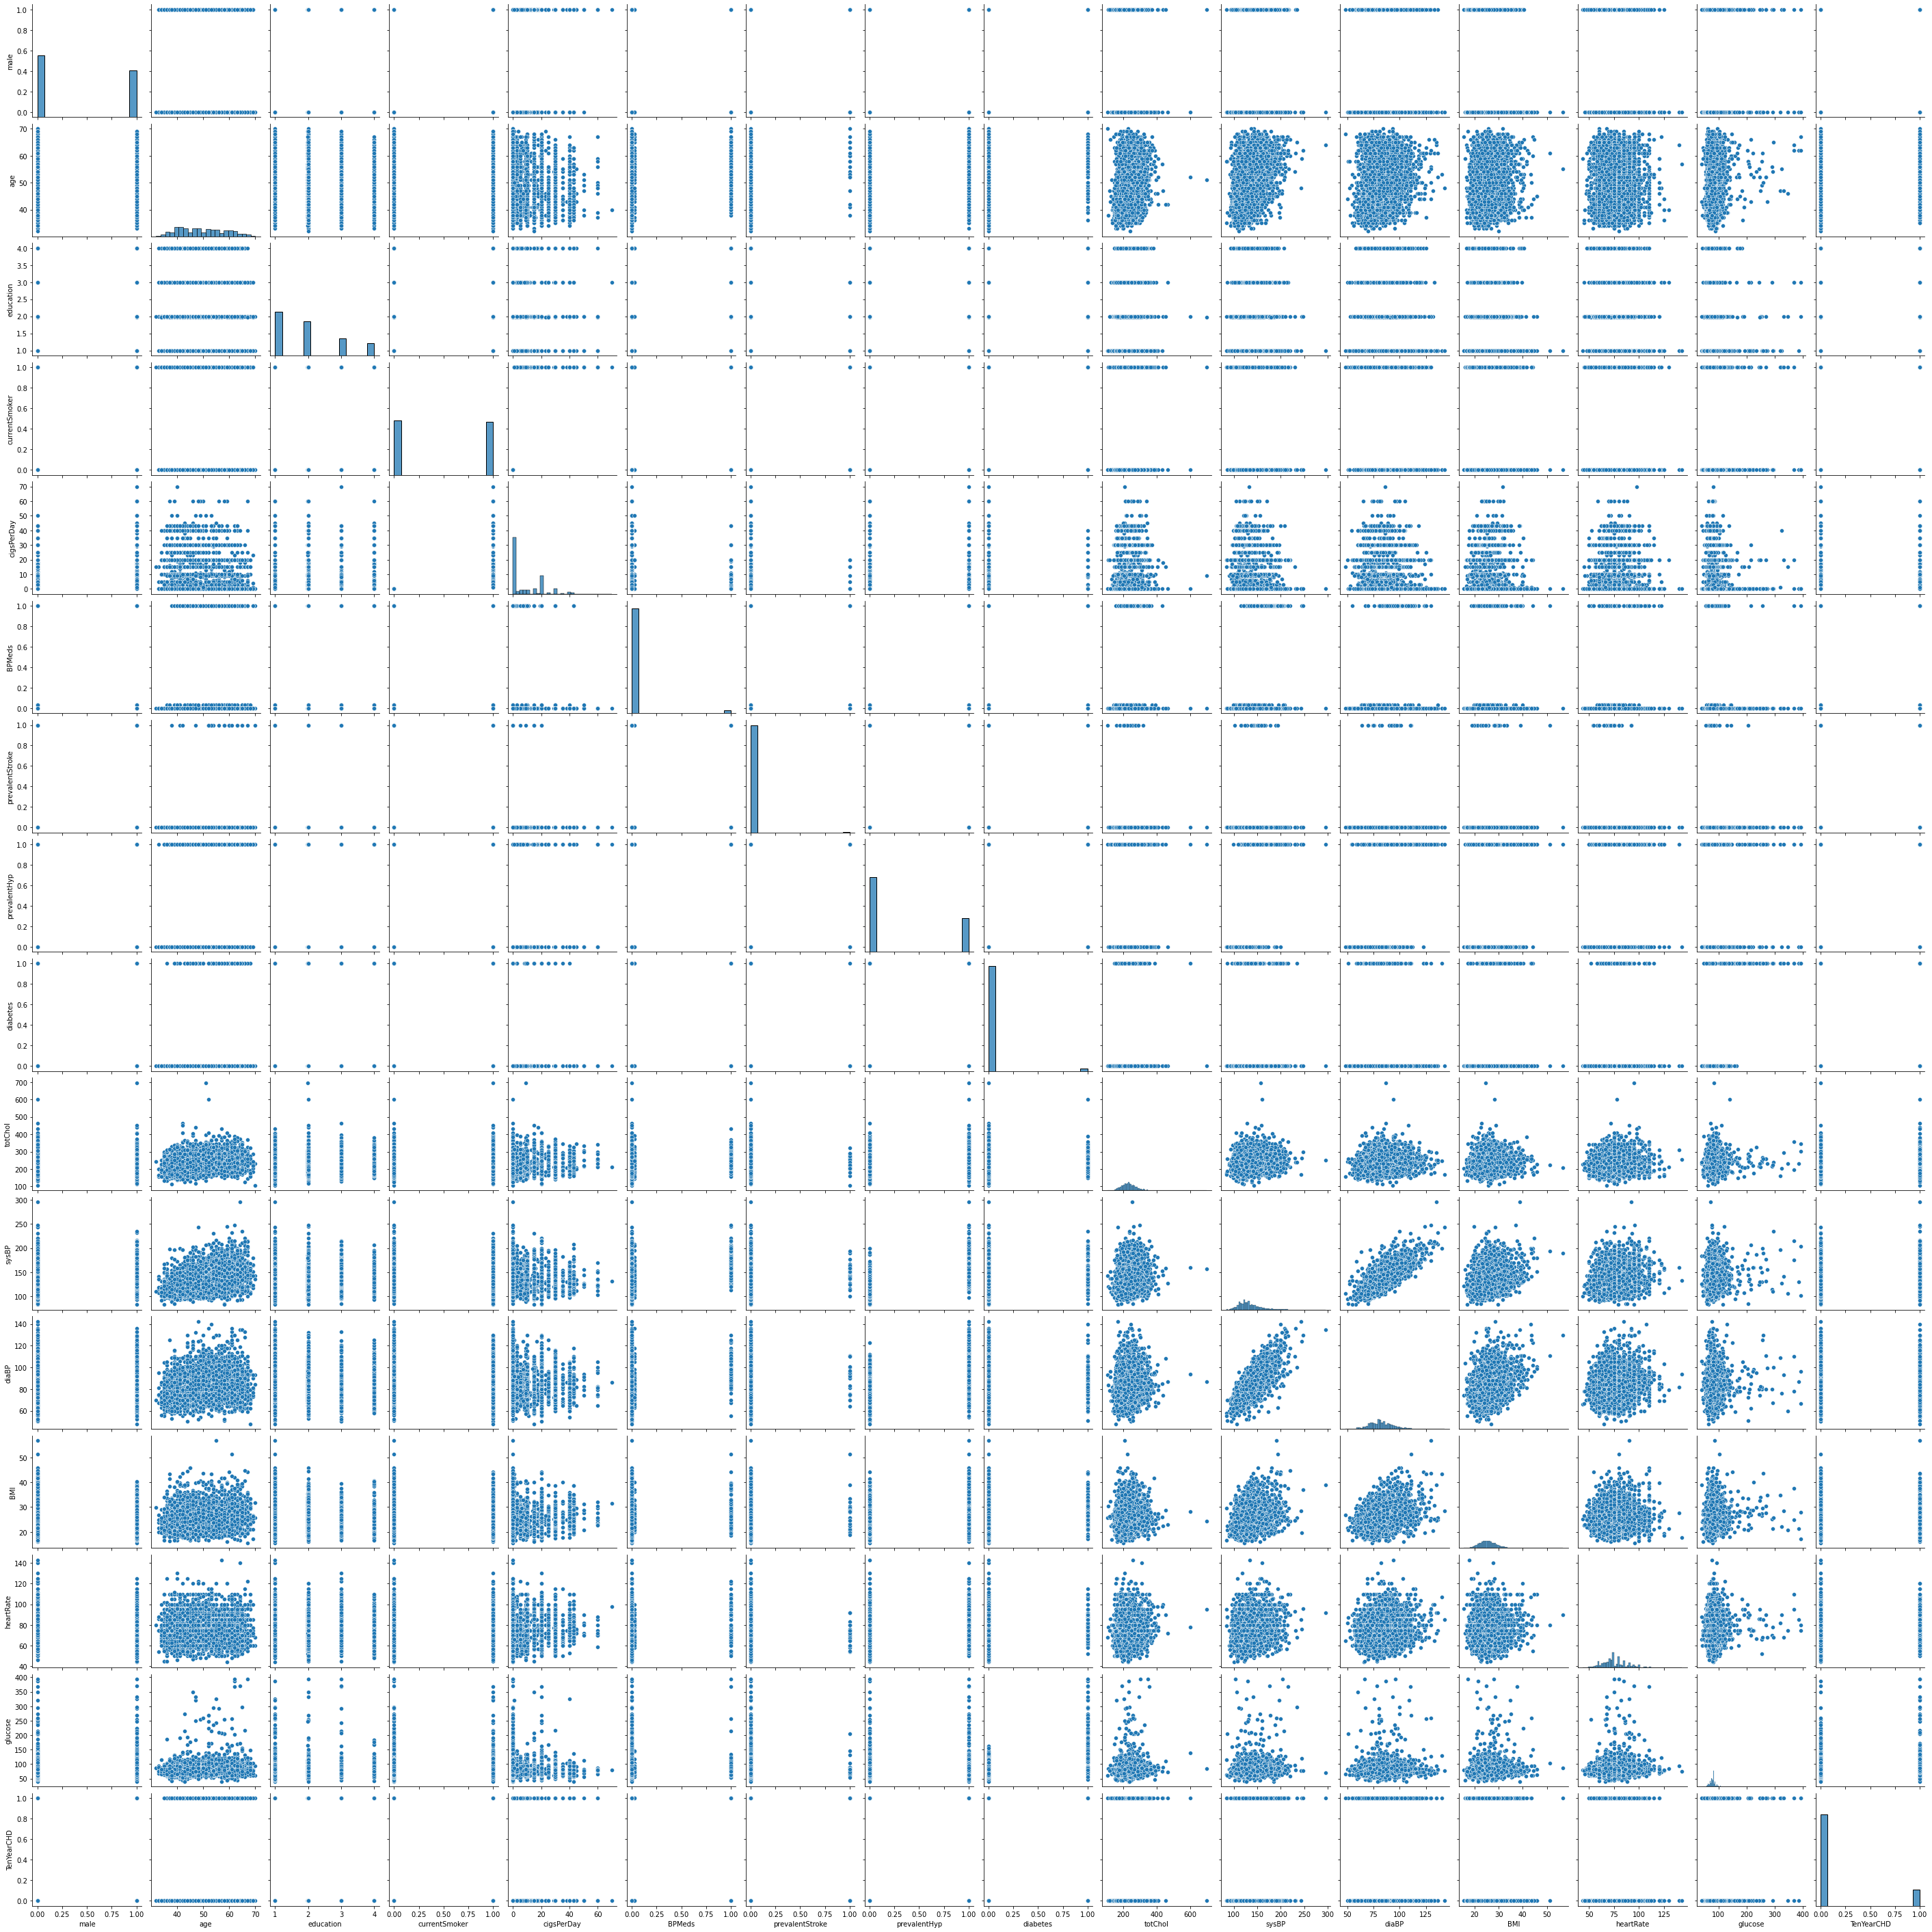

In [17]:
sns.pairplot(data)
plt.show()

## Check correlation heatmap for all values

In a similar fashion, we want to visualize how the features correlate to one another.

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other.

When two features have high correlation it simply means that they have a strong relationship with each other. 

**WHY IS THIS IMPORTANT?**

For better performance and accuracy of the machine learning models, it is highly recommended to drop all features that have high correlation. 

Think of correlated features as duplcates to our modeling process. A group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. 

From the seaborn heatmap below, we can identify the highly correlated features by looking at the intensity of colours for each grid. The more lighter the colour the more the correlation between respective features. The diagonal of the matrix looks highly correlated since along the diagonal, each feature is plotted against itself!

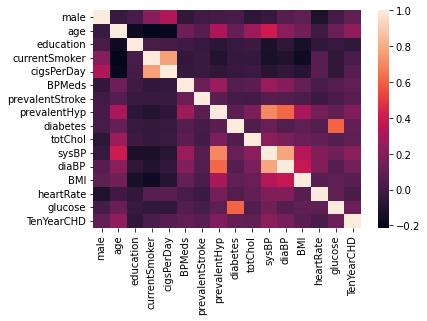

In [18]:
sns.heatmap(data.corr())
plt.show()

## Identify and remove highly correlated features

In [19]:
highly_correlated_features = ['currentSmoker','diaBP','prevalentHyp','diabetes']
# remove these features from the dataset since they highly correlate with other features from the dataset
data.drop(highly_correlated_features,axis=1,inplace=True)

## Plot the correlation heatmap again to confirm

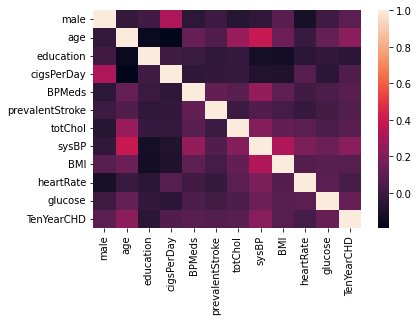

In [20]:
sns.heatmap(data.corr())
plt.show()

## Prepare dataset for training

Now that we have normalized the null values and removed the highly correlated features. We are ready to build and train our model. 

As we said ealier will treat the 'TenYearCHD' as our output feature (y). The rest of the features will be treated as the predictors (X). 

In [21]:
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']

## Using SMOTE to balance the data

Remember ealier we said something about the unbalanced dataset? 
Yes, now we will use SMOTE library to balance the dataset.

SMOTE refers to Synthetic Minority Oversampling Technique, a statistical technique for increasing the number of cases in your dataset in a balanced way. 
<br><br>
<center>
    <img src="img/smote.png" width="500"></img>
</center>
<br>


You can read more about [SMOTE DOCUMENTATION.](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

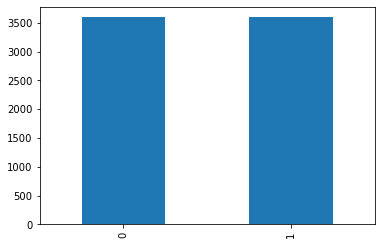

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

## Split dataset to train and test sets

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)
X_train.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
7151,0,62,2.937195,0.0,0.0,0,304.115843,177.502442,32.114327,89.371948,124.995116
6253,0,49,1.157141,0.0,0.0,0,234.427671,142.842859,29.179288,70.785703,85.366214
4666,1,51,1.000000,40.0,0.0,0,227.563631,163.697715,33.721558,89.295462,66.690892
940,0,53,2.000000,0.0,0.0,0,284.000000,167.500000,31.500000,88.000000,87.000000
1511,0,38,2.000000,0.0,0.0,0,255.000000,125.000000,23.050000,72.000000,73.000000


## Scale the data before setting them to the model

The final critical step before dumping our data to the model, we need to do scaling. 
As it can be seen, the columns of the data contains features with various dimensions and scales. Different scales of the data features affect the modeling of a dataset adversely.

It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. **Thus, it is necessary to Scale the data prior to modeling**.

In [25]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.786642,1.274173,1.054162,-0.781388,-0.241292,-0.063372,1.414149,1.748149,1.534863,1.145095,1.301163
1,-0.786642,-0.297932,-0.815979,-0.781388,-0.241292,-0.063372,-0.129340,0.259971,0.786264,-0.453207,0.020249
2,1.271226,-0.056070,-0.981072,2.570475,-0.241292,-0.063372,-0.281368,1.155416,1.944797,1.138518,-0.583388
3,-0.786642,0.185792,0.069537,-0.781388,-0.241292,-0.063372,0.968613,1.318674,1.378175,1.027116,0.073057
4,-0.786642,-1.628175,0.069537,-0.781388,-0.241292,-0.063372,0.326306,-0.506147,-0.777049,-0.348785,-0.379461


## Reset colmns (Scaling removed column indexes)

In [26]:
X_train.columns= X.columns   
X_test.columns= X.columns

y_train.index= X_train.index 
y_test.index= X_test.index

X_train.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
0,-0.786642,1.274173,1.054162,-0.781388,-0.241292,-0.063372,1.414149,1.748149,1.534863,1.145095,1.301163
1,-0.786642,-0.297932,-0.815979,-0.781388,-0.241292,-0.063372,-0.129340,0.259971,0.786264,-0.453207,0.020249
2,1.271226,-0.056070,-0.981072,2.570475,-0.241292,-0.063372,-0.281368,1.155416,1.944797,1.138518,-0.583388
3,-0.786642,0.185792,0.069537,-0.781388,-0.241292,-0.063372,0.968613,1.318674,1.378175,1.027116,0.073057
4,-0.786642,-1.628175,0.069537,-0.781388,-0.241292,-0.063372,0.326306,-0.506147,-0.777049,-0.348785,-0.379461


## Custom function to print the confusion matrix (We will use it later)

In [27]:
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

## Create a Logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Make predictions on the test set

In [29]:
predictions = model.predict(X_test)

# V. Evaluate the model
<a id="5"></a>

Classificatio report               precision    recall  f1-score   support

           0       0.68      0.67      0.67       752
           1       0.64      0.65      0.65       686

    accuracy                           0.66      1438
   macro avg       0.66      0.66      0.66      1438
weighted avg       0.66      0.66      0.66      1438

********
Accuracy with Logistic Regression:  0.6599443671766342
********
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       752
           1       0.64      0.65      0.65       686

    accuracy                           0.66      1438
   macro avg       0.66      0.66      0.66      1438
weighted avg       0.66      0.66      0.66      1438



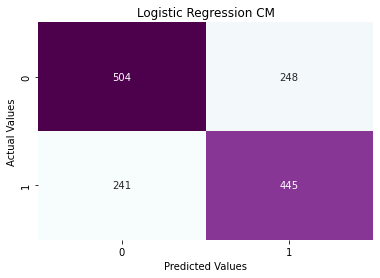

The confusion matrix [[504 248]
 [241 445]]


In [51]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print('Classificatio report',classification_report(y_test,predictions))
print('********')

print('Accuracy with Logistic Regression: ',accuracy_score(y_test,predictions))
print('********')

print('The confusion matrix',my_confusion_matrix(y_test,predictions,'Logistic Regression CM'))

## 1. How to read a confusion matrix

<img src="img/Confusion.PNG">

## 2. Confusion Matrix Informations
Now that we’ve understood the confusion matrix, we are going to use it to calculate other metrics.
Each of these metrics answers a certain question :<br><br><br>
**Accuracy**:
How many Correct predictions we made out of all observations? Accuracy = (TP+TN)/(TP+FP+FN+TN)

**Recall**:
Out of all Employees that got promoted how many did we get correct? Recall = TP/(TP+FN)

**Precision**:
Out of all Employees that we predicted ‘Promoted’ how many did we actually get right? Precision= TP/(TP+FP)

## Bonus: Logistic Regression Disadvantages
Despite being a very efficient technique that does not require too many computational resources, Logistic regression has it’s cons:<br><br>

<li>Limited outcome since it can only predict categorical binary targets.<br>
<li>Vulnerable to overfitting .<br>
<li>Very sensitive to the quality of data and feature selection : You have to do a lot of preprocessing and data visualization before using logistic regression .

<br><br><br><center><h1>We're donnnnne learning!</h1></center><br><br><br>

# ALL CLEAR !!!!! ASSIGNMENT TIME 
<a id="6"></a>

<a id="6"></a>
1. Go to this link : [HR analytics](https://www.kaggle.com/datasets/giripujar/hr-analytics) <br>
2. Download the dataset
3. Do some EDA (Exploratory Data Analysis)
4. Make a logistic regression on the "left" colmun and apply all what we learned 